## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [8]:
df = pd.read_csv("NFLX.csv")

In [7]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [9]:
viz = df.copy()

## Data Preparation

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.shape

(1009, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [14]:
train, test = train_test_split(df, test_size = 0.2)
test_pred = test.copy()
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
158,2018-09-20,370.260010,370.260010,363.170013,365.359985,365.359985,6768100
921,2021-10-01,604.239990,614.989990,597.510010,613.150024,613.150024,4090800
304,2019-04-23,375.450012,384.799988,374.709991,381.890015,381.890015,10089800
142,2018-08-28,367.230011,369.989990,360.380005,368.489990,368.489990,9222600
845,2021-06-15,501.230011,501.230011,490.399994,491.899994,491.899994,3104100
938,2021-10-26,673.760010,676.489990,662.770020,668.520020,668.520020,2904800
175,2018-10-15,337.630005,339.209991,326.929993,333.130005,333.130005,11215000
894,2021-08-24,551.479980,555.309998,549.270020,553.409973,553.409973,2109500
987,2022-01-05,592.000000,592.840027,566.880005,567.520020,567.520020,4148700
571,2020-05-13,435.690002,447.000000,427.269989,438.269989,438.269989,7014600


In [15]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
769,2021-02-25,550.270020,556.479980,535.750000,546.700012,546.700012,4252900
271,2019-03-06,353.600006,359.880005,351.700012,359.609985,359.609985,6211900
847,2021-06-17,490.250000,501.799988,490.149994,498.339996,498.339996,3198300
727,2020-12-23,524.760010,526.320007,514.200012,514.479980,514.479980,2393200
625,2020-07-30,480.709991,488.350006,477.510010,485.799988,485.799988,6608600
146,2018-09-04,366.470001,368.880005,361.260010,363.600006,363.600006,7605200
154,2018-09-14,368.549988,371.089996,363.459991,364.559998,364.559998,4756400
877,2021-07-30,512.690002,519.789978,510.959991,517.570007,517.570007,2534900
872,2021-07-23,512.159973,517.409973,504.660004,515.409973,515.409973,3820500
861,2021-07-08,530.929993,535.500000,529.090027,530.760010,530.760010,3269000


In [16]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [17]:
y_train = train['Close'].values
y_test = test['Close'].values

In [18]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = model_lnr.predict(x_test)

In [20]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.41139859]


## Model Evaluation

In [21]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))


MSE 15.154
RMSE 3.893
MAE 2.717
MAPE 0.007
R2 Score :  0.999


## Visualization

In [22]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


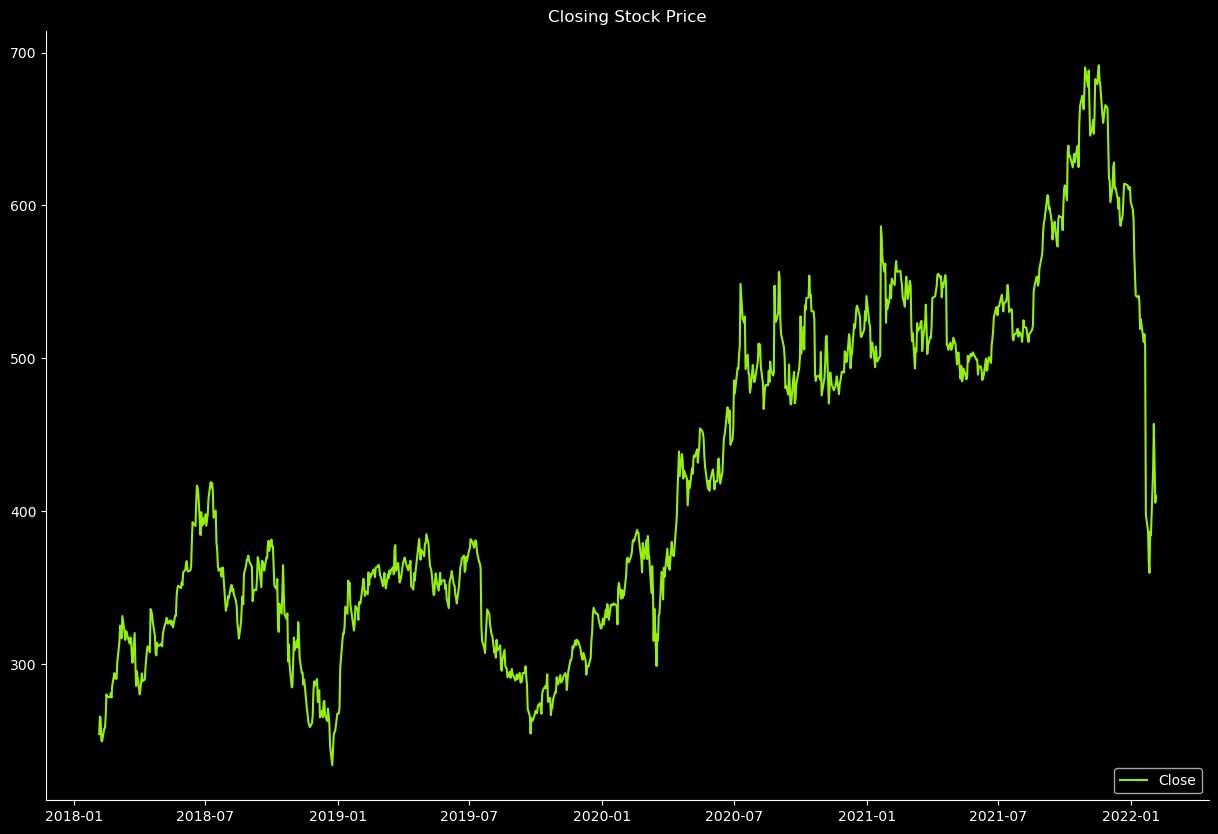

In [23]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

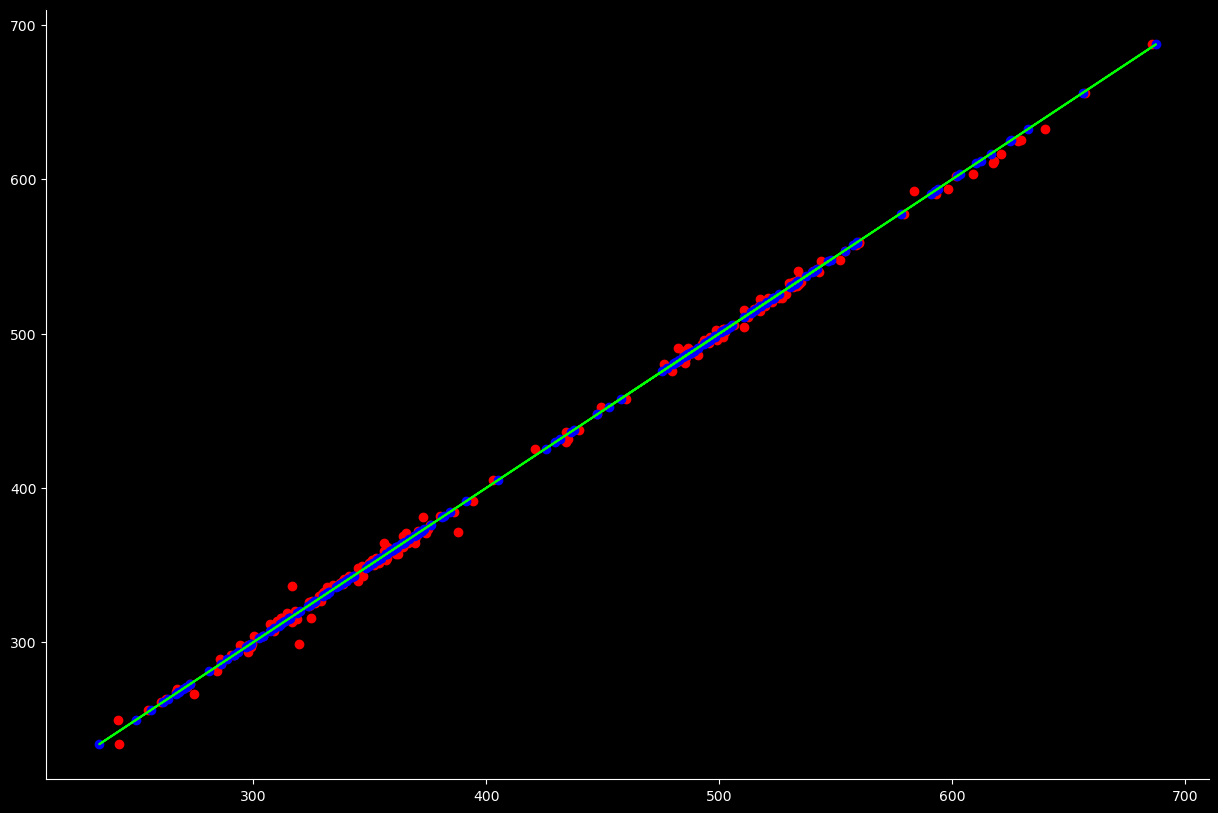

In [24]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [25]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
769,2021-02-25,550.270020,556.479980,535.750000,546.700012,546.700012,4252900,543.598188
271,2019-03-06,353.600006,359.880005,351.700012,359.609985,359.609985,6211900,357.298618
847,2021-06-17,490.250000,501.799988,490.149994,498.339996,498.339996,3198300,499.649225
727,2020-12-23,524.760010,526.320007,514.200012,514.479980,514.479980,2393200,517.402355
625,2020-07-30,480.709991,488.350006,477.510010,485.799988,485.799988,6608600,484.709648
...,...,...,...,...,...,...,...,...
473,2019-12-20,335.000000,338.000000,330.600006,336.899994,336.899994,9914900,334.317179
387,2019-08-20,304.570007,305.000000,297.679993,298.989990,298.989990,7349900,299.428290
360,2019-07-12,378.679993,379.739990,372.790009,373.250000,373.250000,6636900,374.949684
71,2018-05-17,327.529999,330.450012,323.170013,325.220001,325.220001,4935700,326.297773


In [26]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,417.157771,103.896839,233.880005,332.700012,371.414993,504.210007,687.400024
Close_Prediction,202.0,417.287310,104.341651,241.772901,330.218308,372.745901,505.473588,685.690769
